In [28]:
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [29]:
mall_df = pd.read_csv('../input/Mall_Customers.csv')
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [30]:
print (mall_df)

     CustomerID          ...           Spending Score (1-100)
0             1          ...                               39
1             2          ...                               81
2             3          ...                                6
3             4          ...                               77
4             5          ...                               40
5             6          ...                               76
6             7          ...                                6
7             8          ...                               94
8             9          ...                                3
9            10          ...                               72
10           11          ...                               14
11           12          ...                               99
12           13          ...                               15
13           14          ...                               77
14           15          ...                               13
15      

In [31]:
mall_df.shape

(200, 5)

In [32]:
mall_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [33]:
mall_df['Gender'].head()

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object

In [34]:
mall1_df = mall_df.copy()
mall1_df.tail(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


Descriptive statistics of the data

In [35]:
mall_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [36]:
#Load the required packages
import numpy as np
import matplotlib.pyplot as plt

#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Visualizing the data using "distplot"

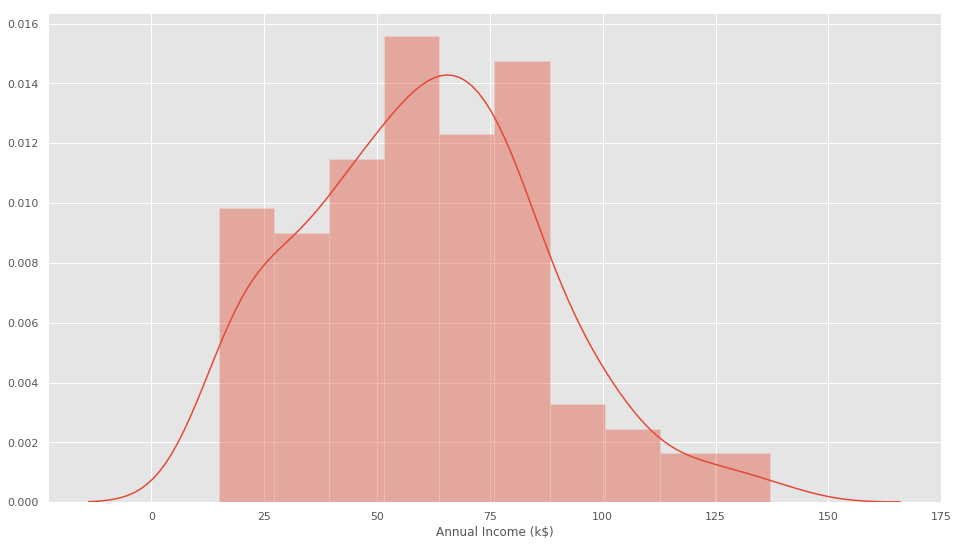

In [37]:
plot_annual_income = sns.distplot(mall_df["Annual Income (k$)"])

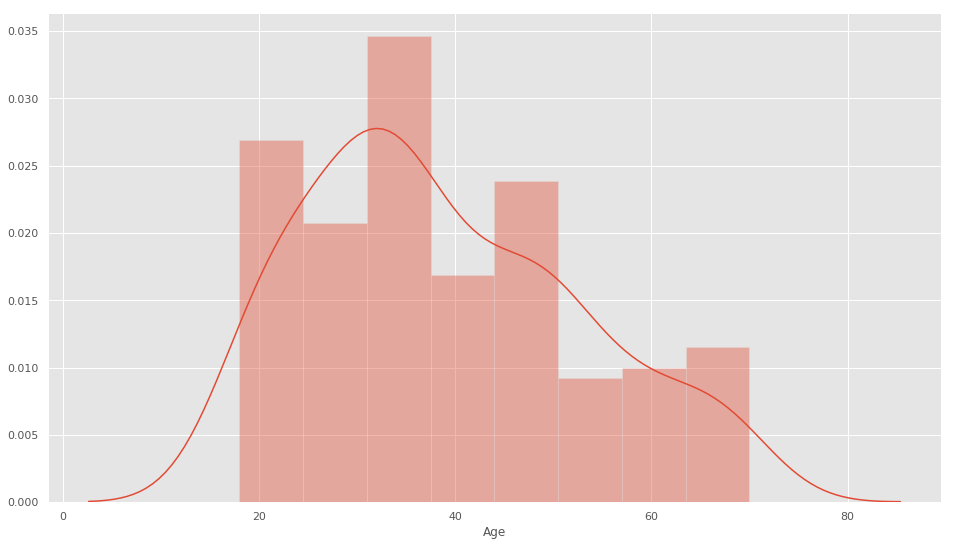

In [38]:
plot_age = sns.distplot(mall_df["Age"])

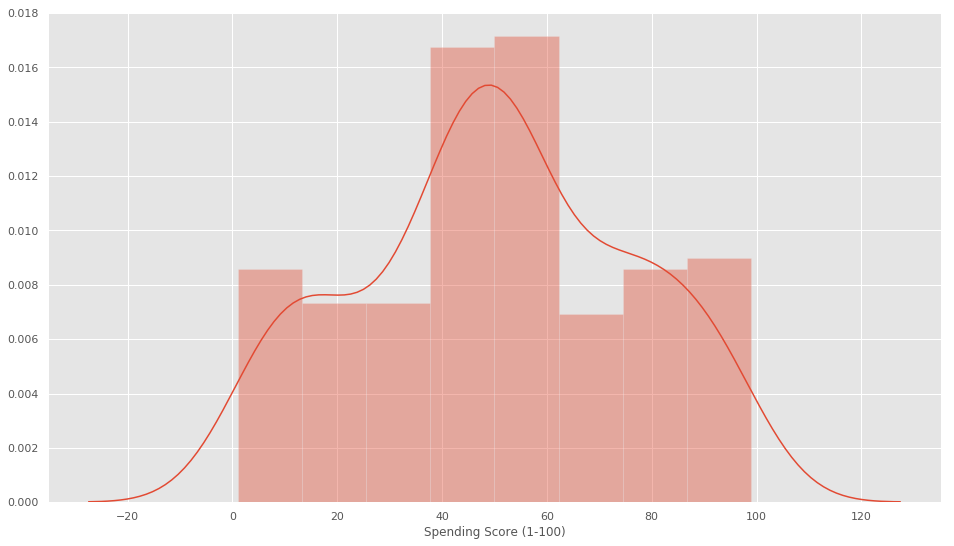

In [39]:
plot_spending_score = sns.distplot(mall_df["Spending Score (1-100)"])

Violin Plot of Annual Income and Spending Score 

[(-20, 160)]

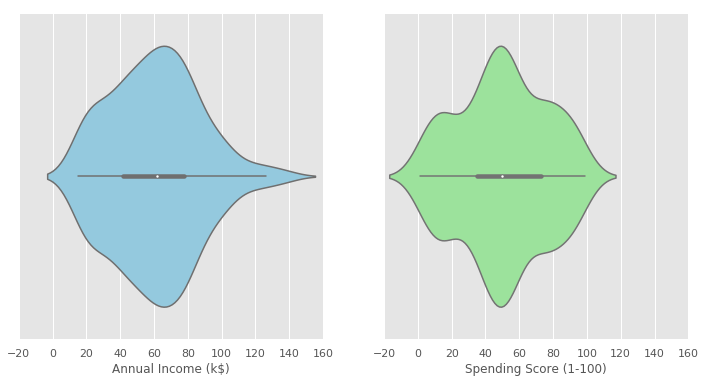

In [40]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=mall_df, x='Annual Income (k$)', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=mall_df, x='Spending Score (1-100)',color="lightgreen", ax=axes[1])
v1.set(xlim=(-20,160))

In [41]:
# Creating subset
mall_df_1 = mall_df[['Annual Income (k$)', 'Spending Score (1-100)']]
mall_df_1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Applying K-Means Clustering to find the target customers

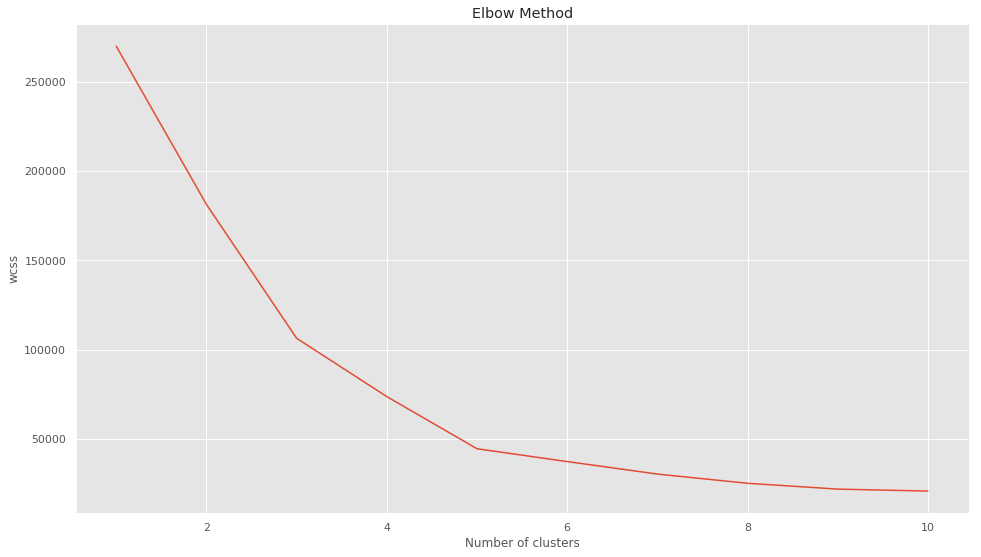

In [42]:
from sklearn.cluster import KMeans

#Using the elbow method to find the optimum number of clusters
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(mall_df_1)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

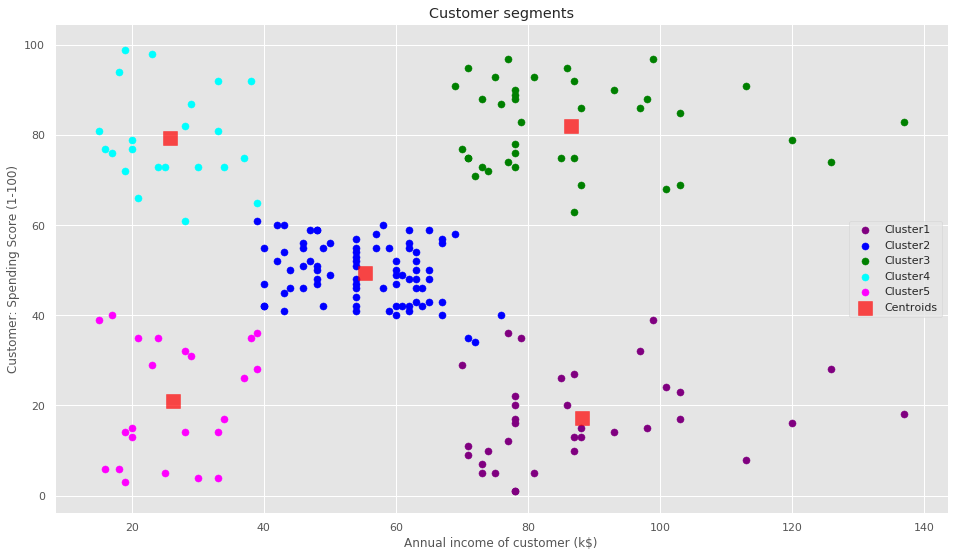

In [43]:
# So..number of clusters should be 5
km5=KMeans(n_clusters=5,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km5.fit_predict(mall_df_1)
#Visualizing the clusters
plt.scatter(mall_df_1[y_means==0]['Annual Income (k$)'],mall_df_1[y_means==0]['Spending Score (1-100)'],s=50, c='purple',label='Cluster1')
plt.scatter(mall_df_1[y_means==1]['Annual Income (k$)'],mall_df_1[y_means==1]['Spending Score (1-100)'],s=50, c='blue',label='Cluster2')
plt.scatter(mall_df_1[y_means==2]['Annual Income (k$)'],mall_df_1[y_means==2]['Spending Score (1-100)'],s=50, c='green',label='Cluster3')
plt.scatter(mall_df_1[y_means==3]['Annual Income (k$)'],mall_df_1[y_means==3]['Spending Score (1-100)'],s=50, c='cyan',label='Cluster4')
plt.scatter(mall_df_1[y_means==4]['Annual Income (k$)'],mall_df_1[y_means==4]['Spending Score (1-100)'],s=50, c='magenta',label='Cluster5')

plt.scatter(km5.cluster_centers_[:,0], km5.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income of customer (k$)')
plt.ylabel('Customer: Spending Score (1-100)')
plt.legend()
plt.show()

Clustering with 3 variables: Age, Annual Income (k$) and Spending Score (1-100) 

In [44]:
# Creating subset
mall_df_2 = mall_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
mall_df_2.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


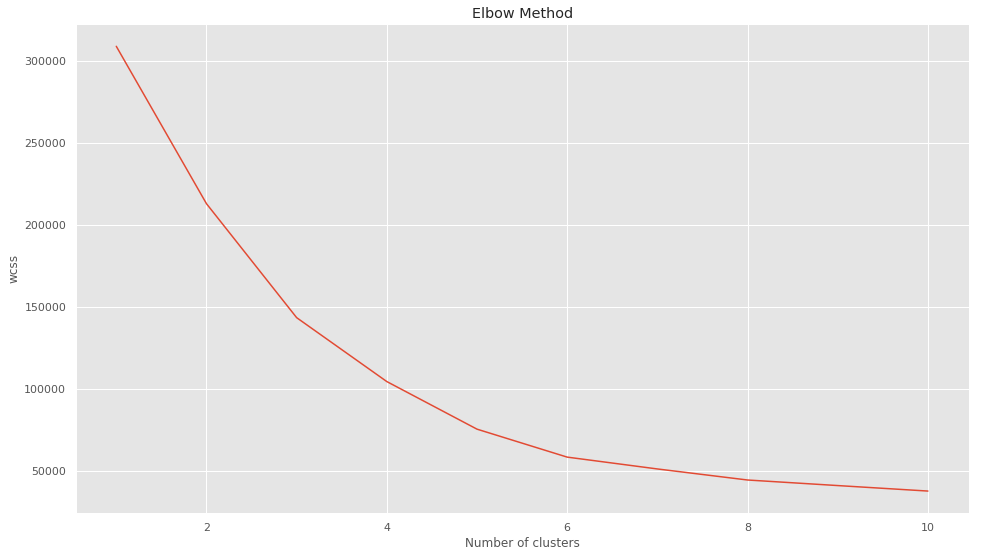

In [45]:
#Using the elbow method to find the optimum number of clusters
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(mall_df_2)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

Hence, the optimum number of clusters = 6 (Elbow Method: Above)

In [48]:
km6 = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
km6.fit(mall_df_2)
labels = km6.labels_
centroids = km6.cluster_centers_

In [49]:
mall_df_2['labels'] =  labels
trace1 = go.Scatter3d(
    x= mall_df_2['Age'],
    y= mall_df_2['Spending Score (1-100)'],
    z= mall_df_2['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = mall_df_2['labels'], 
        size= 20,
        line=dict(
            color= mall_df_2['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
